Customer Retention & Churn Analysis

Goal:
Analyze customer churn patterns, retention drivers, and customer lifetime trends
for a subscription-based business, and provide actionable recommendations
to reduce customer loss.

Dataset: Telco Customer Churn (SaaS / Subscription Scenario)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Upload Telco Customer Churn CSV before running
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

In [ ]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
churn_rate

,proportion
Churn,
No,73.421502
Yes,26.578498


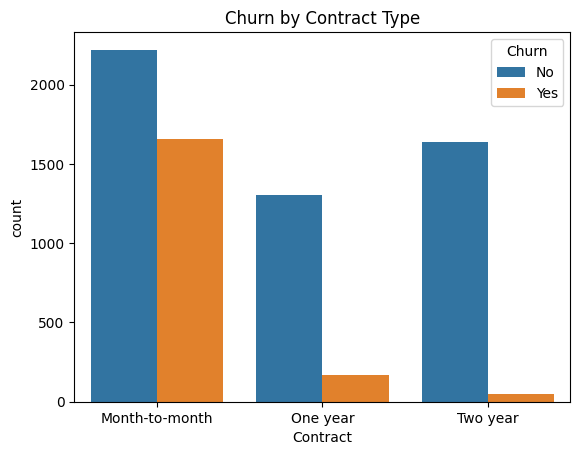

In [ ]:
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn by Contract Type")
plt.show()

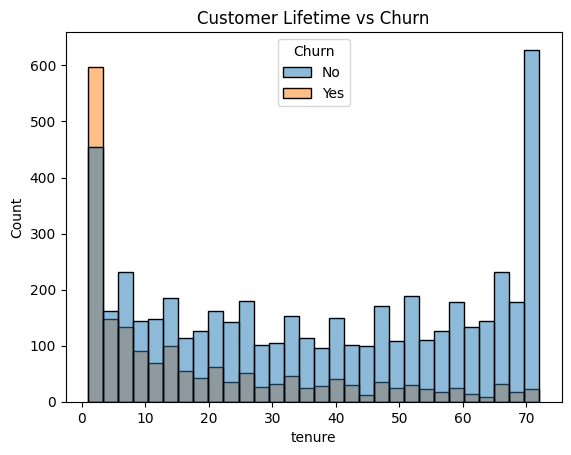

In [ ]:
sns.histplot(data=df, x='tenure', hue='Churn', bins=30)
plt.title("Customer Lifetime vs Churn")
plt.show()

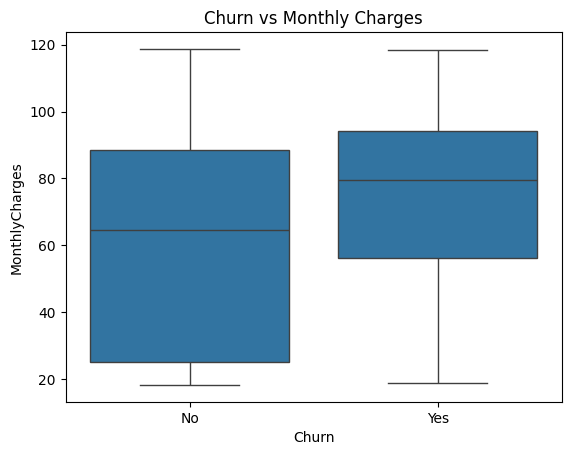

In [ ]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Churn vs Monthly Charges")
plt.show()

In [ ]:
segment_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100
segment_churn

Churn,No,Yes
InternetService,,
DSL,81.001656,18.998344
Fiber optic,58.107235,41.892765
No,92.565789,7.434211


In [ ]:
df['TenureGroup'] = pd.cut(df['tenure'],
                           bins=[0,6,12,24,60],
                           labels=['0-6 months','6-12 months','1-2 years','2+ years'])

cohort_retention = pd.crosstab(df['TenureGroup'], df['Churn'], normalize='index') * 100
cohort_retention


Churn,No,Yes
TenureGroup,,
0-6 months,46.666667,53.333333
6-12 months,64.113475,35.886525
1-2 years,71.289062,28.710938
2+ years,81.657049,18.342951


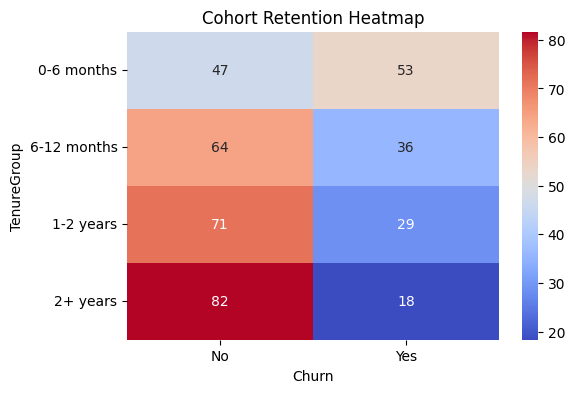

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cohort_retention, annot=True, cmap="coolwarm")
plt.title("Cohort Retention Heatmap")
plt.show()

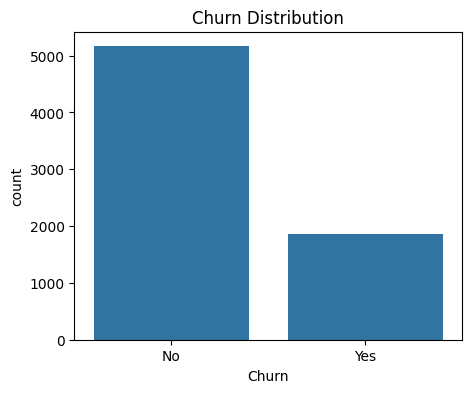

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_ml = df.copy()

encoder = LabelEncoder()
for col in df_ml.select_dtypes(include='object').columns:
    df_ml[col] = encoder.fit_transform(df_ml[col])

df_ml.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,2,29.85,29.85,0,0-6 months
1,3953,1,0,0,0,34,1,0,0,2,...,0,0,0,1,0,3,56.95,1889.50,0,2+ years
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,1,3,53.85,108.15,1,0-6 months
3,5524,1,0,0,0,45,0,1,0,2,...,2,0,0,1,0,0,42.30,1840.75,0,2+ years
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,2,70.70,151.65,1,0-6 months


In [ ]:
from sklearn.model_selection import train_test_split

X = df_ml.drop('Churn', axis=1)
y = df_ml['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

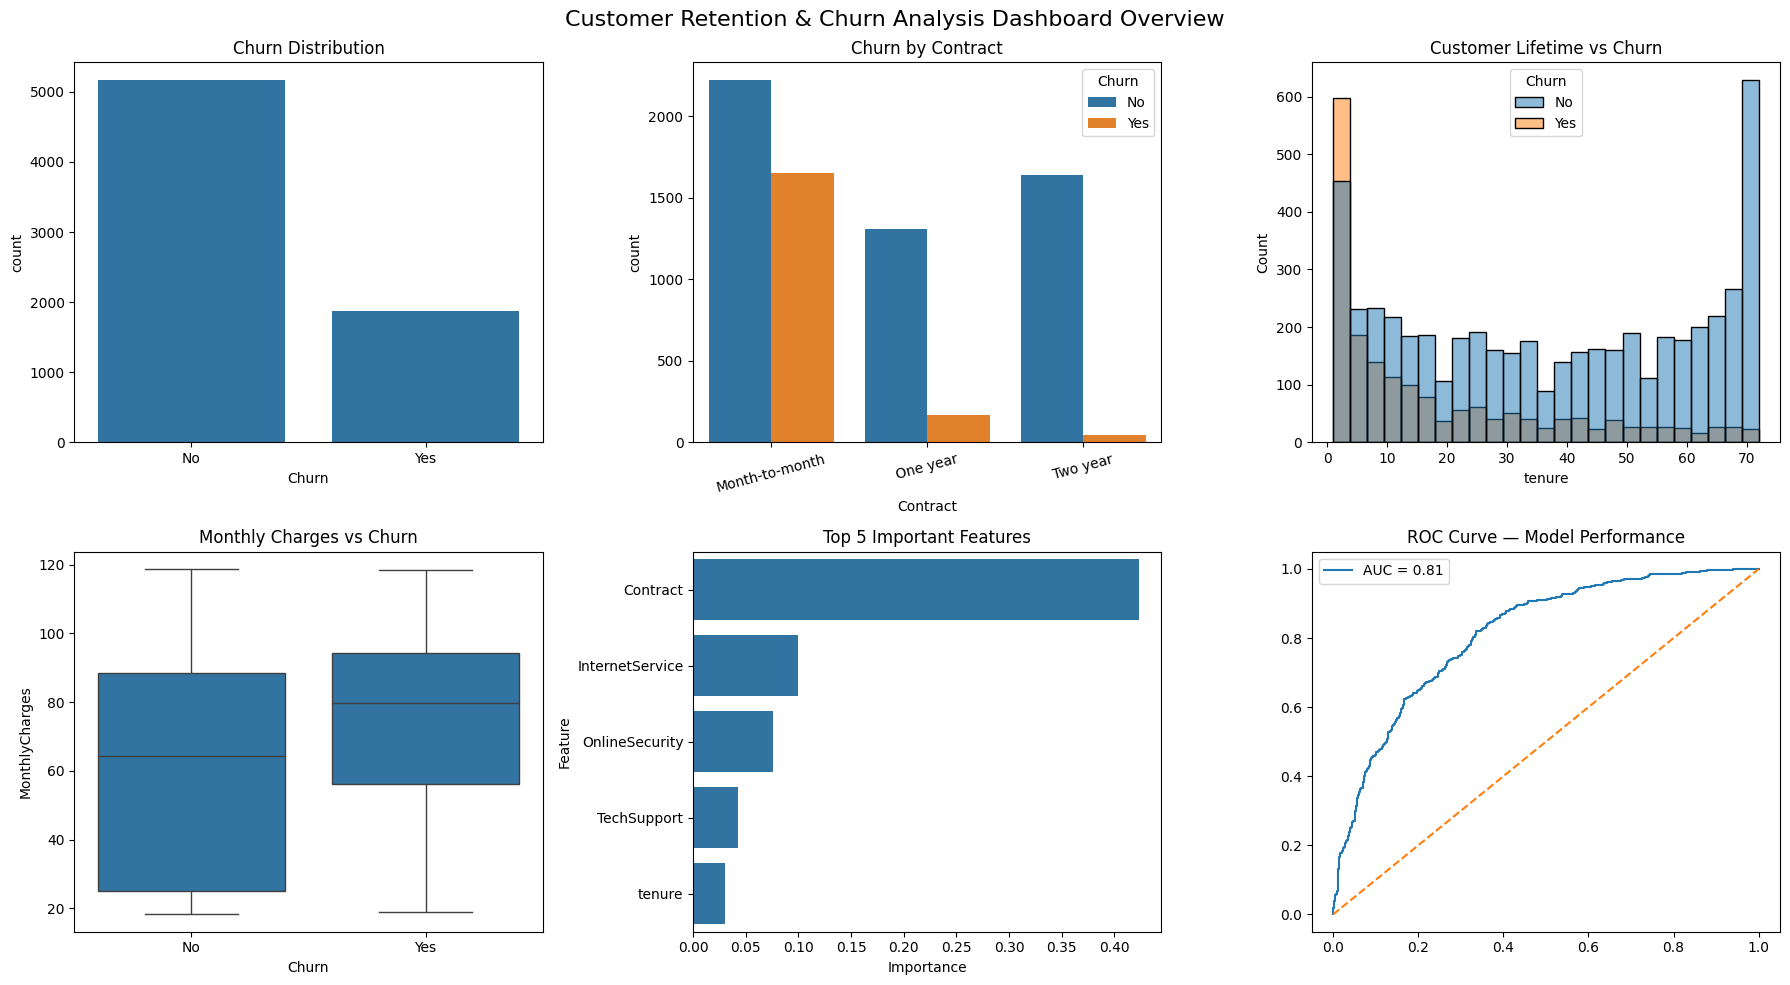

In [ ]:
# ============================================================
# OVERALL CHURN ANALYSIS DASHBOARD — TASK SUMMARY VIEW
# This dashboard visually summarizes churn patterns, customer lifetime,
# pricing impact, contract risk, and ML feature importance.
# ============================================================

from sklearn.metrics import roc_curve, auc

# Calculate Feature Importance
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Calculate ROC Curve metrics
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Churn Distribution
sns.countplot(data=df, x='Churn', ax=axes[0,0])
axes[0,0].set_title("Churn Distribution")

# 2. Churn by Contract Type
sns.countplot(data=df, x='Contract', hue='Churn', ax=axes[0,1])
axes[0,1].set_title("Churn by Contract")
axes[0,1].tick_params(axis='x', rotation=15)

# 3. Tenure vs Churn
sns.histplot(data=df, x='tenure', hue='Churn', bins=25, ax=axes[0,2])
axes[0,2].set_title("Customer Lifetime vs Churn")

# 4. Monthly Charges vs Churn
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', ax=axes[1,0])
axes[1,0].set_title("Monthly Charges vs Churn")

# 5. Top 5 Feature Importance (XGBoost)
top5 = feat_imp.head(5)
sns.barplot(x='Importance', y='Feature', data=top5, ax=axes[1,1])
axes[1,1].set_title("Top 5 Important Features")

# 6. ROC Curve Snapshot
axes[1,2].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
axes[1,2].plot([0,1],[0,1],'--')
axes[1,2].set_title("ROC Curve — Model Performance")
axes[1,2].legend()

plt.suptitle("Customer Retention & Churn Analysis Dashboard Overview", fontsize=16)
plt.tight_layout()
plt.show()

Key Insights:

1. Month-to-month customers show the highest churn, indicating low commitment plans increase customer loss.
2. Most churn occurs within the first year, highlighting the importance of early customer engagement.
3. Higher monthly charges increase churn risk, suggesting price sensitivity among customers.
4. Long-term customers demonstrate stronger retention and loyalty.
5. Fiber internet users show higher churn, indicating possible service quality or value concerns.


Business Recommendations:

- Encourage customers to switch to long-term contracts using discounts or added benefits.
- Improve onboarding experience to retain new users during the first 6–12 months.
- Offer loyalty rewards and retention offers for long-term customers.
- Review pricing strategies to reduce churn among high-paying customers.
- Improve service quality and customer support in high-churn segments such as Fiber Internet users.


Conclusion:

This churn and retention analysis identifies key customer loss drivers in a
subscription business. Early-stage users, high-paying customers, and short-term
contract subscribers show the highest churn risk.

Focusing on better onboarding, long-term plans, pricing optimization, and
customer loyalty programs can significantly improve retention and revenue.

This project reflects real-world SaaS business analytics decision-making.
